<a href="https://colab.research.google.com/github/NRJaggers/Applied-Stochastic-Processes/blob/main/PracticeProblems/Intro_to_MCMC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction to Markov Chain Monte Carlo (MCMC) Methods

---

## Prompt

Original Prompt can be found [here](https://bookdown.org/kevin_davisross/applied-stochastic-processes/pp-mcmc-intro.html). A copy of the prompt  can be found on github under [/PracticeProblems/Prompts](https://github.com/NRJaggers/Applied-Stochastic-Processes/tree/main/PracticeProblems/Prompts) along with completed exercises under [/PracticeProblems](https://github.com/NRJaggers/Applied-Stochastic-Processes/tree/main/PracticeProblems).

---

## Problems

###1.

$$\int_0^{1}\int_{1}^{2} \exp\left(-\frac{2}{3}\left(x^2 + y^2 -0.5 xy\right)\right)\, dx\, dy$$

####a.

The function above represents a 3d surface. The double integral of the function is finding the area under a specific part of the 3d surface.

We can approximate the area under the curve using a Monte Carlo approach. This can be accomplished by generating random points uniformly for variables x, y, and z. Although they are generated uniformly they can be scaled or translated to appropriate ranges. Then using the funtion for the random values of x and y, we can find another set of z values that we will call z_func. Then we can compare the random z values to the z_func values and determine if they are above, below or equal. This is the same thing as finding the amount of random points that lie above and below/on the curve.

Finally the area under the curve can be approximated by finding the volume of the box we are integrating over (x-range, y-range, z-range) and multiplying that by the ratio of points that fell on or below the curve.

####b.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [32]:
# Define the function
def f(x, y):
    return np.exp(-2/3 * (x**2 + y**2 - 0.5*x*y))

# Generate x and y coordinates
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)

# Calculate function values over the grid
Z = f(X, Y)

# Find max value of surface
Z.max()

0.9990821478386752

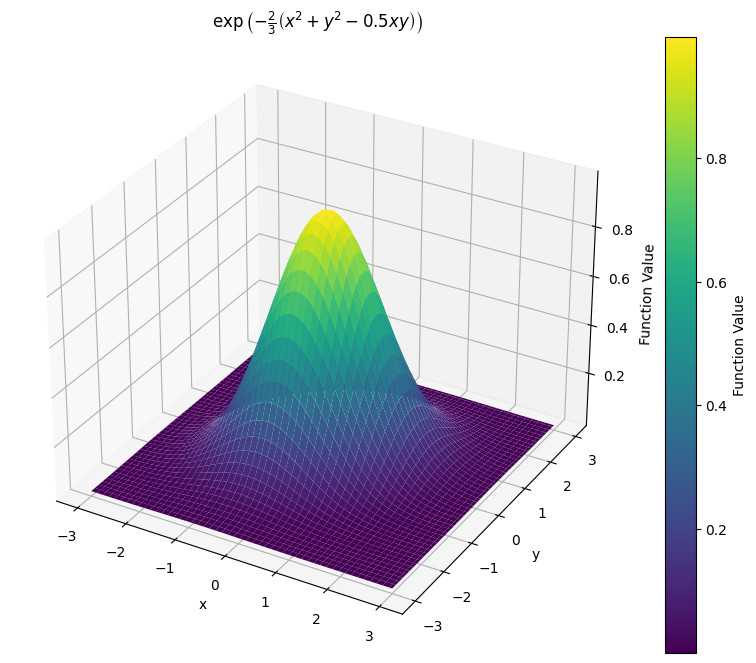

In [30]:
# Plot entire the surface
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')
fig.colorbar(surf, label='Function Value')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('Function Value')
ax.set_title(r'$\exp\left(-\frac{2}{3}\left(x^2 + y^2 -0.5 xy\right)\right)$')

plt.show()

In [33]:
# Generate x and y coordinates as seen in integral
x = np.linspace(1, 2, 100)
y = np.linspace(0, 1, 100)
X, Y = np.meshgrid(x, y)

# Calculate function values over the grid
Z = f(X, Y)

# Find max value of surface
surface_max = Z.max()
surface_max

0.5352591529846453

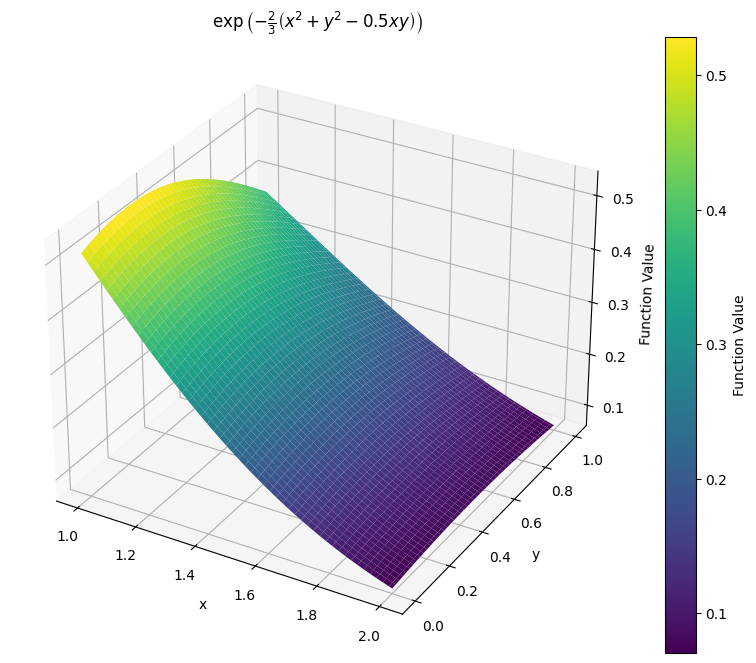

In [25]:
# Plot section of the surface
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')
fig.colorbar(surf, label='Function Value')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('Function Value')
ax.set_title(r'$\exp\left(-\frac{2}{3}\left(x^2 + y^2 -0.5 xy\right)\right)$')

plt.show()

In [55]:
# we want to approximate the area under the surface seen above

#generate random points for x, y, and z
samples = 10000
xs = np.random.rand(samples) + 1
ys = np.random.rand(samples)
zs = np.random.rand(samples) * surface_max

#count number of points above and below surface
Zs = f(xs,ys)
above = np.sum(zs > Zs)
below = np.sum(zs <= Zs)

#multiply volume with ratio to approximate area under the curve.
base = 2 - 1 # x
width = 1 - 0 # y
height = surface_max
volume = base * width * height

area_under_curve = volume * (below/samples)
area_under_curve

0.24745030642480154

Analytic solution per WolframAlpha:

$$\int_0^{1}\int_{1}^{2} \exp\left(-\frac{2}{3}\left(x^2 -0.5 xy + y^2\right)\right)\, dx\, dy = 0.248432$$

As we can see, the appoximated solution is rather close to the calculated solution from WolframAlpha. Also as we increase the amount of random samples, we can better approximate the calculated answer.

###2.

---

## Reflection

With each Practice Problem submission, you should also take a few minutes to reflect on the practice problems and related material and thoughtfully respond to the following.

1. Write a sentence or two summarizing - in your own words - one big idea from this material.
2. Describe one particular aspect of this material that you found challenging and why. Then describe how you dealt with the challenge, or what you can do to deal with the challenge.
3. Write at least one specific question you have about this material. I strongly encourage you to post your questions directly in Discord as that's where I'll respond to questions. That is, if you really want an answer to your question - which I hope you do! - please post the question directly in Discord.